## I Import des données 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## II Génération du dataset Blobs

Nous créons un dataset binaire avec 2 classes bien séparées.

In [5]:
# Génération des données
X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.5, random_state=42)


# Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalisation pour une meilleure convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## III Fonction de Visualisation des Frontières de Décision


On va tracer les frontières de décision du SVM pour différentes valeurs de C et sigma.

In [8]:
def plot_decision_boundary(X, y, model, title):

    """

    Affiche la frontière de décision d'un modèle SVM.

    """
    h = 0.02  # Pas du maillage
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


    # Prédictions sur la grille
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Affichage de la frontière
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.bwr)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()


## IV Entraînement du SVM avec Différentes Valeurs de C et Sigma

Le noyau RBF (Radial Basis Function) est contrôlé par le paramètre gamma, qui est lié à sigma par :


$\gamma = \frac{1}{2\sigma^2}$


Nous allons tester différentes valeurs de C et gamma :

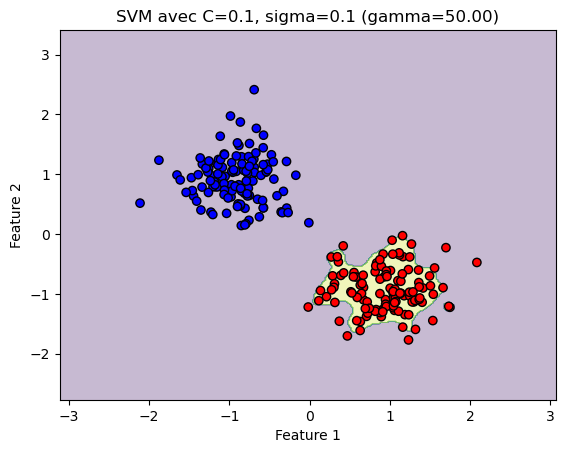

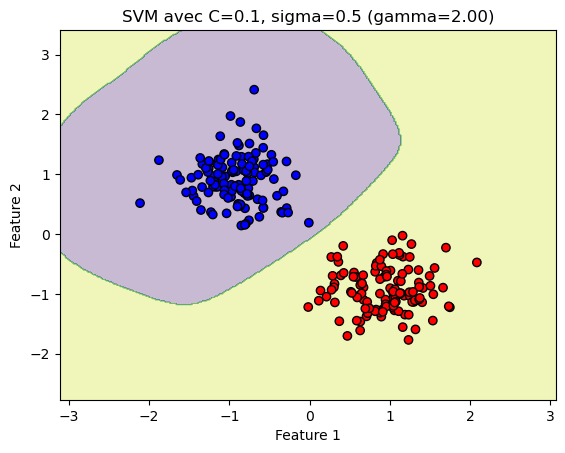

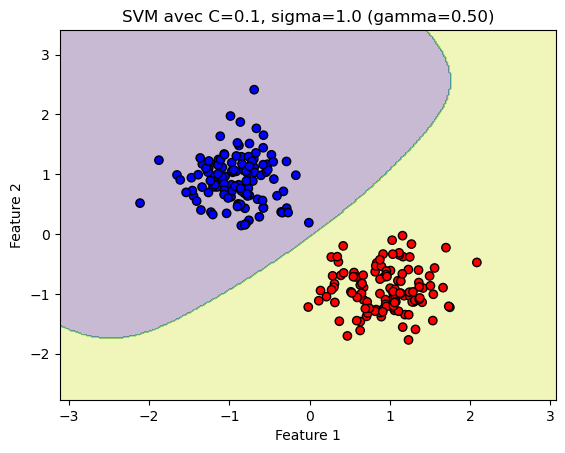

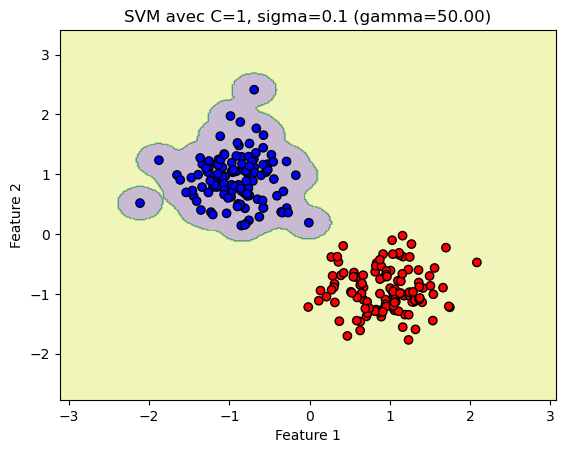

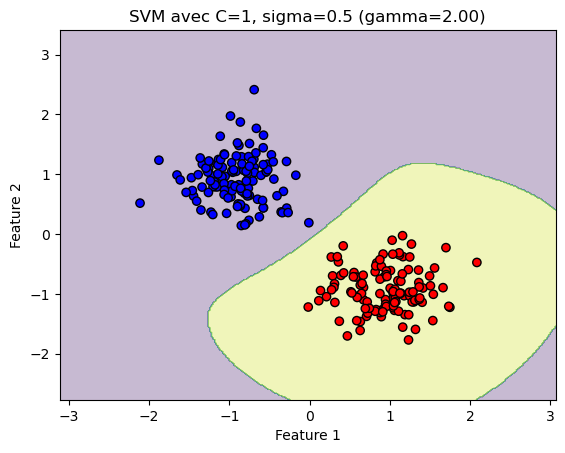

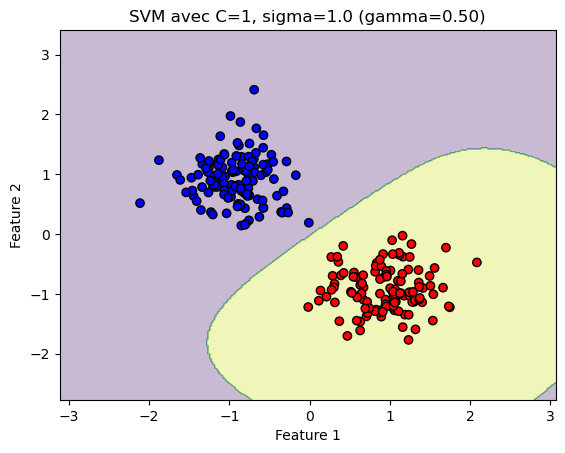

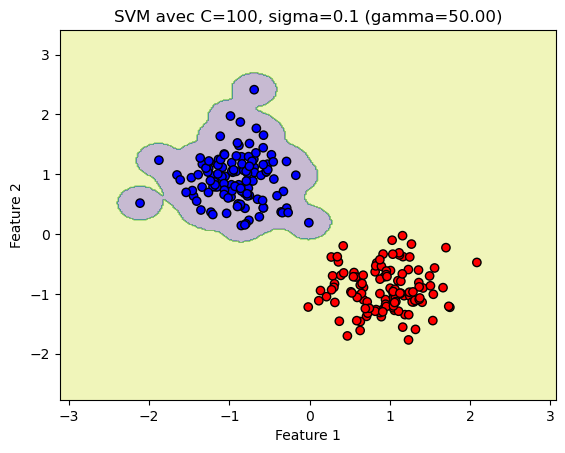

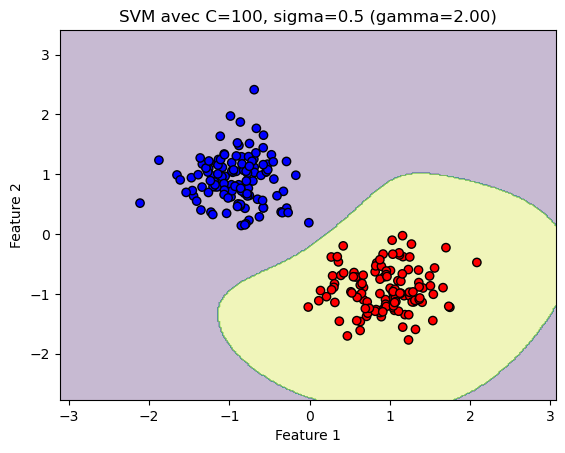

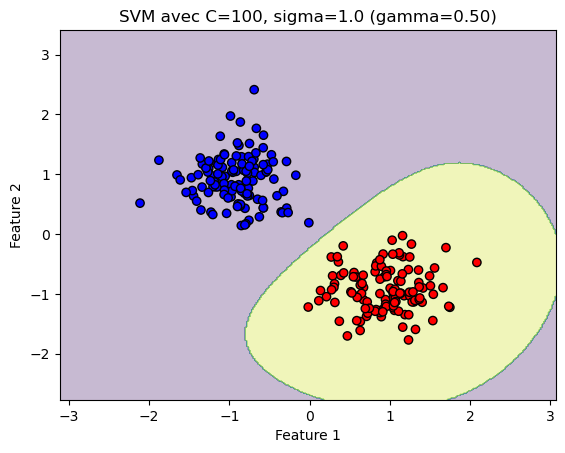

In [22]:
# Liste des valeurs de C et sigma

C_values = [0.1, 1, 100]

sigma_values = [0.1, 0.5, 1.0]  # On convertira en gamma


for C in C_values:

    for sigma in sigma_values:

        gamma = 1 / (2 * sigma**2)  # Conversion sigma → gamma

        model = SVC(kernel='rbf', C=C, gamma=gamma)

        model.fit(X_train, y_train)

        

        # Visualisation de la frontière de décision

        title = f"SVM avec C={C}, sigma={sigma} (gamma={gamma:.2f})"

        plot_decision_boundary(X_train, y_train, model, title)


## Interprétation des résultats

• Petit C (0.1) : SVM moins pénalisé → grande marge mais plus d’erreurs.

• Grand C (100) : SVM fortement pénalisé → marge plus petite mais moins d’erreurs.

• Petit sigma (0.1) → Gamma élevé → zones de décision très petites et complexes (risque de sur-ajustement).

• Grand sigma (1.0) → Gamma plus faible → séparation plus douce.

## Expérimentations 
• Changer n_samples ou cluster_std dans make_blobs pour voir comment le SVM réagit.

• Utiliser un noyau linéaire (kernel='linear') et comparer avec rbf.

• Essayer GridSearchCV pour trouver le meilleur C et sigma.

## VI Entraînement du SVM et calcul des erreurs (pour C =1)

Nous allons faire varier sigma dans une plage définie et calculer :

• Erreur d’entraînement = 1 - accuracy_score(y_train, y_train_pred)

• Erreur de test = 1 - accuracy_score(y_test, y_test_pred)

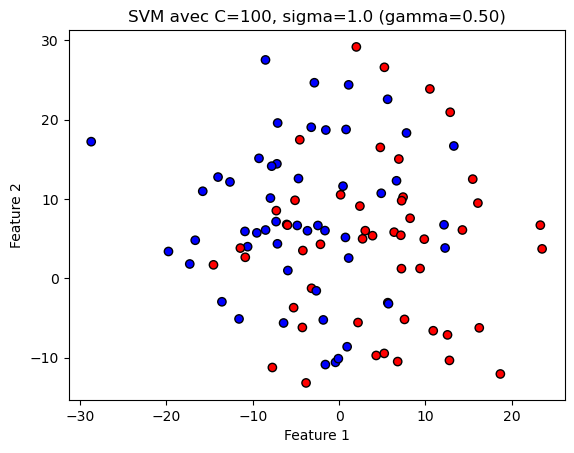

In [72]:
# Génération des données
X, y = make_blobs(n_samples=100, centers=2, cluster_std=10, random_state=42)


# Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalisation pour une meilleure convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.bwr)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(title)
plt.show()

In [74]:
# Paramètre C fixe

C_fixed = 10

# Liste des valeurs de sigma à tester

sigma_values = np.linspace(0.1, 2.0, 20)  # De 0.1 à 2.0 avec 20 points

train_errors = []

test_errors = []


for sigma in sigma_values:

    gamma = 1 / (2 * sigma**2)  # Conversion sigma → gamma

    

    # Entraînement du SVM

    model = SVC(kernel='rbf', C=C_fixed, gamma=gamma)

    model.fit(X_train, y_train)

    

    # Prédictions

    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    

    # Calcul des erreurs

    train_error = 1 - accuracy_score(y_train, y_train_pred)

    test_error = 1 - accuracy_score(y_test, y_test_pred)

    

    train_errors.append(train_error)

    test_errors.append(test_error)


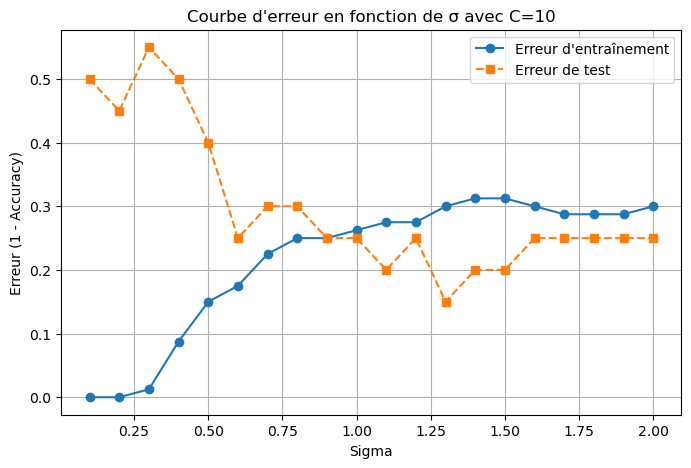

In [76]:
plt.figure(figsize=(8,5))
plt.plot(sigma_values, train_errors, label="Erreur d'entraînement", marker='o', linestyle='-')
plt.plot(sigma_values, test_errors, label="Erreur de test", marker='s', linestyle='--')
plt.xlabel("Sigma")
plt.ylabel("Erreur (1 - Accuracy)")
plt.title(f"Courbe d'erreur en fonction de σ avec C={C_fixed}")
plt.legend()
plt.grid(True)
plt.show()
